In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',100)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


conclusions from above table,
1. satisfaction level is low for the employee left(0.44) wrto retained employee(.66)
2. average working hours is high for the employee left(207.41) wrto retained employee(199.06)

In [7]:
#impact of Salary on employee retention

pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

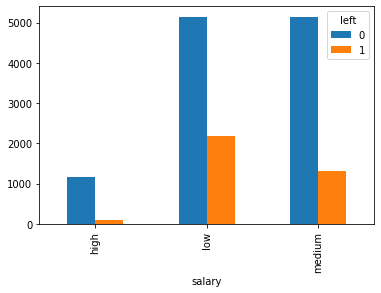

In [8]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
subdf= df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [11]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
salary_dummies= pd.get_dummies(subdf.salary,prefix="salary",drop_first=True)

In [15]:
df_dummies=pd.concat([subdf,salary_dummies],axis=1)

In [27]:
df_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [33]:
df_dummies.drop('salary',axis=1,inplace= True)

KeyError: "['salary'] not found in axis"

In [34]:
X=df_dummies.copy()

In [35]:
y= df.left

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
lr= LogisticRegression()

In [44]:
lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
lr.score(X_train, y_train)

0.7782645966282503

In [47]:
lr.score(X_test, y_test)

0.7675555555555555